In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regressors import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn') # pretty matplotlib plots
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')
sub_data = data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','FullBath','LotFrontage','LotArea','SalePrice']]
sub_data = sub_data.dropna()
X = sub_data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','FullBath','LotFrontage','LotArea']]
y = sub_data['SalePrice']
lm = LinearRegression()
lm.fit(X,y)
stats.summary(lm,X,y,X.columns)

Residuals:
Min           1Q      Median           3Q          Max
-76739.2921  128410.9904  173701.089  226334.1752  572794.9174


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -1.335804e+06  148870.305728  -8.9729  0.000000
OverallQual   2.793341e+04    1120.627580  24.9266  0.000000
OverallCond   4.963979e+03    1336.491618   3.7142  0.000213
YearBuilt     4.010057e+02      35.446587  11.3130  0.000000
YearRemodAdd  2.011070e+02      34.730784   5.7905  0.000000
1stFlrSF      4.164191e+01       3.245758  12.8296  0.000000
TotRmsAbvGrd  9.325669e+03     911.404486  10.2322  0.000000
FullBath      3.665716e+03    2931.247688   1.2506  0.211337
LotFrontage   4.613005e+01      58.997174   0.7819  0.434426
LotArea       1.038411e+00       0.113864   9.1198  0.000000
---
R-squared:  0.74963,    Adjusted R-squared:  0.74774
F-statistic: 396.22 on 9 features


In [5]:
X = sub_data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','FullBath','LotArea']]
y = sub_data['SalePrice']
lm = LinearRegression()
lm.fit(X,y)
stats.summary(lm,X,y,X.columns)

Residuals:
Min           1Q       Median           3Q          Max
-77282.5268  128319.7204  173686.6034  225966.3604  567582.6004


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -1.334632e+06  148899.029354  -8.9633  0.000000
OverallQual   2.791051e+04    1120.286938  24.9137  0.000000
OverallCond   5.005951e+03    1335.727882   3.7477  0.000187
YearBuilt     4.039060e+02      35.443375  11.3958  0.000000
YearRemodAdd  1.981270e+02      34.732352   5.7044  0.000000
1stFlrSF      4.254065e+01       3.220765  13.2082  0.000000
TotRmsAbvGrd  9.467997e+03     895.285841  10.5754  0.000000
FullBath      3.534906e+03    2926.947822   1.2077  0.227397
LotArea       1.078644e+00       0.113832   9.4758  0.000000
---
R-squared:  0.74951,    Adjusted R-squared:  0.74783
F-statistic: 445.83 on 8 features


In [6]:
X = sub_data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','LotArea']]
y = sub_data['SalePrice']
lm = LinearRegression()
lm.fit(X,y)
stats.summary(lm,X,y,X.columns)

Residuals:
Min           1Q       Median           3Q          Max
-79074.0308  128115.6777  173936.4439  225506.5632  570541.1741


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -1.389458e+06  140883.790585  -9.8624  0.000000
OverallQual   2.810595e+04    1087.223038  25.8511  0.000000
OverallCond   4.860513e+03    1331.980804   3.6491  0.000274
YearBuilt     4.172716e+02      35.446073  11.7720  0.000000
YearRemodAdd  2.134060e+02      34.737888   6.1433  0.000000
1stFlrSF      4.259853e+01       3.222381  13.2196  0.000000
TotRmsAbvGrd  9.967560e+03     860.674302  11.5811  0.000000
LotArea       1.076167e+00       0.113892   9.4490  0.000000
---
R-squared:  0.74924,    Adjusted R-squared:  0.74777
F-statistic: 509.22 on 7 features


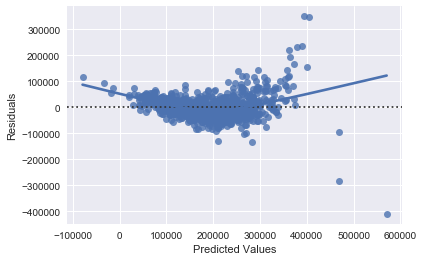

In [8]:
def residplot(model,X,y,**kwargs):
    '''
    This function plots a regular residual plot
    Inputs:
        model = Trained sklearn model
        X: Predictors as a pandas dataframe
        y: Responses as a pandas dataframe
        kwargs: seaborn.residplot arguments
    Output:
        Matplotlib axes
    '''
    vals = {'Residuals': y-model.predict(X), 'Predicted Values': model.predict(X)}
    resdf = pd.DataFrame(vals)
    ax = sns.residplot(y='Residuals',x='Predicted Values', data=resdf, **kwargs)
    return ax
residplot(lm,X,y, lowess = True)

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly_lm_freg = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_regression,22),
                               LinearRegression())
poly_lm_freg.fit(X,y)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('selectkbest', SelectKBest(k=22, score_func=<function f_regression at 0x000002B3E6DEDAE8>)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [13]:
inpipepf = poly_lm_freg.named_steps['polynomialfeatures']
inpipesk = poly_lm_freg.named_steps['selectkbest']
inpipelm = poly_lm_freg.named_steps['linearregression']

In [14]:
from itertools import compress
Xlabels = list(compress(inpipepf.get_feature_names(X.columns),inpipesk.get_support()))

In [16]:
stats.summary(inpipelm,inpipesk.transform((inpipepf.transform(X))),y,Xlabels)

Residuals:
Min           1Q       Median           3Q          Max
53774.9233  125981.7598  162054.7994  218378.2509  512552.0198


Coefficients:
                               Estimate    Std. Error  t value   p value
_intercept                -2.305381e+06  1.607955e+07  -0.1434  0.886019
OverallQual               -1.434558e+05  1.337449e+05  -1.0726  0.283663
YearBuilt                 -7.586139e+03  4.904467e+03  -1.5468  0.122180
YearRemodAdd               9.549141e+03  4.804869e+03   1.9874  0.047106
1stFlrSF                   1.765831e+03  3.800481e+02   4.6463  0.000004
TotRmsAbvGrd              -2.549247e+05  9.243461e+04  -2.7579  0.005906
OverallQual^2              1.136238e+03  6.362363e+02   1.7859  0.074372
OverallQual OverallCond    5.796173e+02  6.943777e+02   0.8347  0.404036
OverallQual YearBuilt      5.448633e+01  2.756576e+01   1.9766  0.048316
OverallQual YearRemodAdd  -4.714944e+00  2.696879e+01  -0.1748  0.861243
OverallQual 1stFlrSF       3.323688e+01  2.109105e+

In [18]:
poly_lm_freg_scaled = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_regression,22),
                               LinearRegression())
y_scaled = np.log10(y) + 1
poly_lm_freg_scaled.fit(X,y_scaled)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('selectkbest', SelectKBest(k=22, score_func=<function f_regression at 0x000002B3E6DEDAE8>)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [19]:
test_data = pd.read_csv('test.csv')
X_test_test = test_data[['OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','LotArea']]
predictions_test_scaled = poly_lm_freg_scaled.predict(X_test_test)
predictions_test = 10**(predictions_test_scaled - 1)
output = pd.DataFrame()
output['Id'] = test_data.Id
output['SalePrice'] = predictions_test
output.to_csv('predictions2.csv',index=False)